# importing dataset

In [6]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_f003c4a10adb4bb3a8109e0dff1650c7 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='V6dZPm-KScGcJq-R0U9W6bT0GOq4BRjJlcovdGTRSvvN',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_f003c4a10adb4bb3a8109e0dff1650c7.get_object(Bucket='project-donotdelete-pr-sfjgqcheobrju2',Key='List Of Successful candidate.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df= pd.read_excel(body)
df.head()


,SL. No.,STATE,CONSTITUENCY,WINNER NAME,CATEGORY,SOCIAL CATEGORY,PARTY,PARTY SYMBOL,MARGIN
0,1,Andaman & Nicobar Islands,Andaman & Nicobar Islands,KULDEEP RAI SHARMA,GEN,GEN,INC,Hand,1407.0
1,2,Andhra Pradesh,Aruku,GODDETI. MADHAVI,ST,ST,YSRCP,Ceiling Fan,224089.0
2,3,Andhra Pradesh,Srikakulam,KINJARAPU RAM MOHAN NAIDU,GEN,GEN,TDP,Bicycle,6653.0
3,4,Andhra Pradesh,Vizianagaram,Bellana Chandra Sekhar,GEN,GEN,YSRCP,Ceiling Fan,48036.0
4,5,Andhra Pradesh,Visakhapatnam,M V V SATYANARAYANA,GEN,GEN,YSRCP,Ceiling Fan,4414.0


In [66]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 9 columns):
SL. No.            544 non-null object
STATE              542 non-null object
CONSTITUENCY       542 non-null object
WINNER NAME        542 non-null object
CATEGORY           542 non-null object
SOCIAL CATEGORY    542 non-null object
PARTY              542 non-null object
PARTY SYMBOL       542 non-null object
MARGIN             542 non-null float64
dtypes: float64(1), object(8)
memory usage: 38.5+ KB


In [67]:
df.shape

(547, 9)

In [68]:
df.isnull().sum()

SL. No.            3
STATE              5
CONSTITUENCY       5
WINNER NAME        5
CATEGORY           5
SOCIAL CATEGORY    5
PARTY              5
PARTY SYMBOL       5
MARGIN             5
dtype: int64

In [69]:
df.dropna(inplace=True)

In [70]:
df.isnull().sum()

SL. No.            0
STATE              0
CONSTITUENCY       0
WINNER NAME        0
CATEGORY           0
SOCIAL CATEGORY    0
PARTY              0
PARTY SYMBOL       0
MARGIN             0
dtype: int64

# importing important libraries

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# COUNTPLOT

1.Category

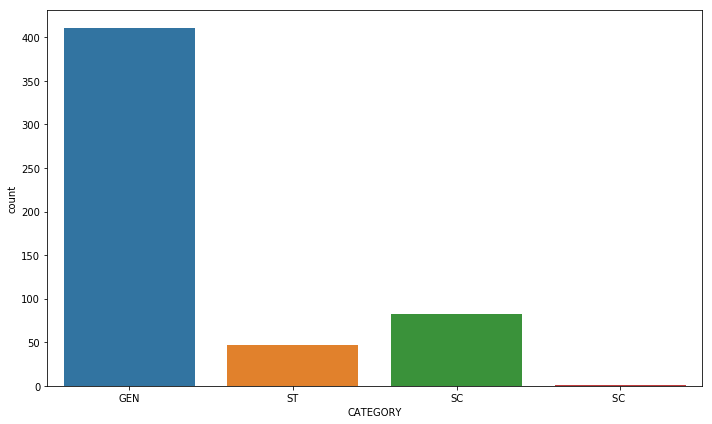

In [73]:
fig=plt.figure(figsize=(10,6))
sns.countplot('CATEGORY',data=df )
plt.tight_layout()
plt.show()

2.Party

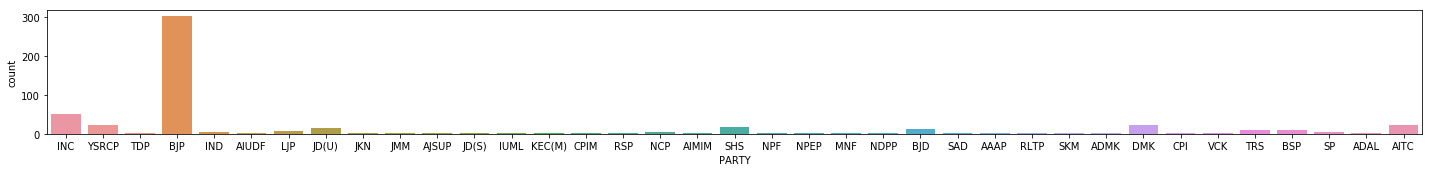

In [74]:
fig=plt.figure(figsize=(20,2.5))
sns.countplot('PARTY',data=df)
plt.tight_layout()
plt.show()

3.Party Symbol

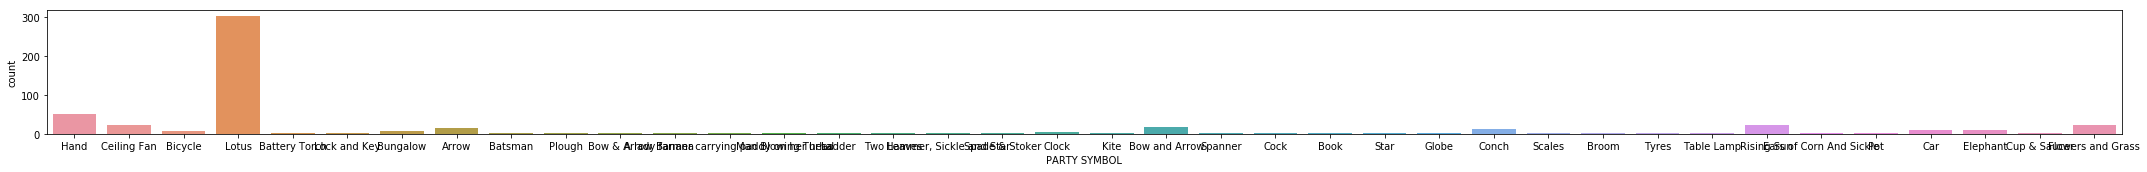

In [75]:
fig=plt.figure(figsize=(30,2.5))
sns.countplot('PARTY SYMBOL',data=df)
plt.tight_layout()
plt.show()

State

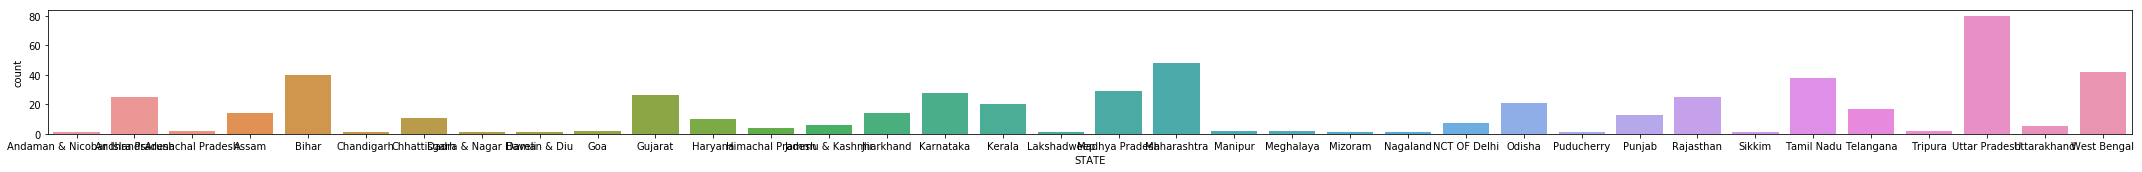

In [76]:
fig=plt.figure(figsize=(30,2.5))
sns.countplot('STATE',data=df)
plt.tight_layout()
plt.show()

# conclusion from above visualizations:-

1.category:- which category has how much votes

2.party:- which party has how much votes

3.party symbol:- can visualize party symbol which is used for the visulization

4.state:- which states have maximum votes

# importing second dataset

In [7]:

body = client_f003c4a10adb4bb3a8109e0dff1650c7.get_object(Bucket='project-donotdelete-pr-sfjgqcheobrju2',Key='2019_Results_Winning_Candidate.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df1 = pd.read_csv(body)
df1.head()


,State,Constituency,Votes,Percentage,Party,Candidate
0,Andaman & Nicobar Islands,Andaman & Nicobar Islands,95308,45.98,Indian National Congress,KULDEEP RAI SHARMA
1,Andhra Pradesh,Amalapuram,485313,39.43,Yuvajana Sramika Rythu Congress Party,CHINTA ANURADHA
2,Andhra Pradesh,Anakapalli,586226,47.33,Yuvajana Sramika Rythu Congress Party,Dr.Beesetti Venkata Satyavathi
3,Andhra Pradesh,Anantapur,695208,51.79,Yuvajana Sramika Rythu Congress Party,TALARI RANGAIAH
4,Andhra Pradesh,Aruku,562190,52.32,Yuvajana Sramika Rythu Congress Party,GODDETI. MADHAVI


Changing column names according to first dataset

In [78]:
df1= df1.rename({"State":"STATE","Constituency":"CONSTITUENCY","Party":"PARTY","Candidate":"CANDIDATE"}, axis='columns') 
df1.head(5)

,STATE,CONSTITUENCY,Votes,Percentage,PARTY,CANDIDATE
0,Andaman & Nicobar Islands,Andaman & Nicobar Islands,95308,45.98,Indian National Congress,KULDEEP RAI SHARMA
1,Andhra Pradesh,Amalapuram,485313,39.43,Yuvajana Sramika Rythu Congress Party,CHINTA ANURADHA
2,Andhra Pradesh,Anakapalli,586226,47.33,Yuvajana Sramika Rythu Congress Party,Dr.Beesetti Venkata Satyavathi
3,Andhra Pradesh,Anantapur,695208,51.79,Yuvajana Sramika Rythu Congress Party,TALARI RANGAIAH
4,Andhra Pradesh,Aruku,562190,52.32,Yuvajana Sramika Rythu Congress Party,GODDETI. MADHAVI


# Heatmap

In [ ]:
correlation betwwen votes and percentage among different parties

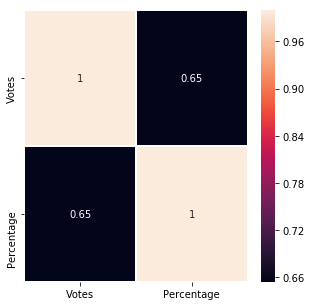

In [79]:
corr_matrix=df1.corr()
figure,ax=plt.subplots(figsize=(5,5))
sns.heatmap(corr_matrix, annot=True,linewidth=0.5,ax=ax)

# Vionlin plot

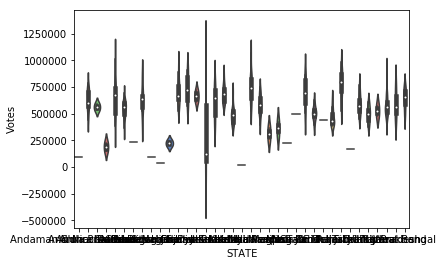

In [88]:
ax = sns.violinplot(x="STATE", y="Votes",
                    data=df1, palette="muted")

# Factorplot

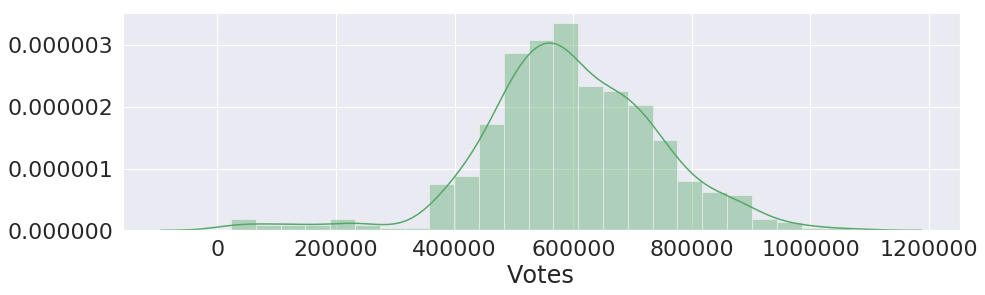

In [10]:
f,axes=plt.subplots (1,1,figsize=(15,4))
sns.distplot(df1['Votes'],kde=True,hist=True,color="g")